# 🤖 NexoCommerce - Demonstração do Sistema Multi-Agente

**Objetivo:** Demonstrar o funcionamento completo do sistema multi-agente

**Conteúdo:**
1. Carregamento do modelo treinado
2. Inicialização dos agentes
3. Análise com Analyst Agent
4. Estratégia com Strategist Agent
5. Relatório com Reporter Agent
6. Visualização dos resultados
7. Exportação de relatórios

---

In [1]:
# Imports
import sys
import os
from pathlib import Path

# Add src to path
sys.path.append(str(Path.cwd().parent))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

# Configurações
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

print("✅ Imports realizados com sucesso!")

✅ Imports realizados com sucesso!


## 1️⃣ Preparação: Dados e Modelo

In [2]:
from src.pipeline.data_loader import DataLoader
from src.pipeline.data_processing import DataProcessor
from src.models.product_model import ProductLifecycleModel

# Carregar dados
print("📊 Carregando dados...")
loader = DataLoader()
df = loader.load_data(source="synthetic", n_samples=500)

print(f"✅ Dados carregados: {len(df)} produtos")
print(f"\n📋 Primeiras linhas:")
display(df.head())

INFO:src.pipeline.data_loader:Generating 500 synthetic samples
INFO:src.pipeline.data_loader:Generated synthetic data with shape: (500, 17)


📊 Carregando dados...
✅ Dados carregados: 500 produtos

📋 Primeiras linhas:


,product_id,product_name,category,price,stock_quantity,sales_last_30d,views_last_30d,rating,num_reviews,days_since_launch,discount_percentage,return_rate,supplier_rating,shipping_time_days,is_promoted,competitor_price,created_at
0,PROD_00000,Produto 0,Alimentos,301.50,434,197,402,1.6,359,713,21.5,0.178,3.4,19,0,71.58,2025-12-13T14:47:25.847772
1,PROD_00001,Produto 1,Esportes,391.25,197,199,1086,2.8,74,533,15.4,0.211,3.1,10,0,824.48,2025-12-13T14:47:25.847772
2,PROD_00002,Produto 2,Livros,852.63,133,24,4540,1.0,47,723,24.1,0.020,4.3,7,1,318.27,2025-12-13T14:47:25.847772
3,PROD_00003,Produto 3,Alimentos,323.75,66,88,5009,2.0,159,652,5.9,0.069,3.6,18,0,407.68,2025-12-13T14:47:25.847772
4,PROD_00004,Produto 4,Casa e Decoração,177.80,195,267,3172,3.9,312,293,48.1,0.275,3.6,16,1,507.72,2025-12-13T14:47:25.847772


In [3]:
# Processar dados
print("⚙️ Processando dados...")
processor = DataProcessor()
processed_df, features = processor.process_pipeline(df, is_training=True)

X = processed_df[features]
y = processed_df['lifecycle_action']

print(f"✅ Features criadas: {len(features)}")

INFO:src.pipeline.data_processing:Creating engineered features...
INFO:src.pipeline.data_processing:Created 29 total features
INFO:src.pipeline.data_processing:Creating target variable...
INFO:src.pipeline.data_processing:Target distribution:
lifecycle_action
0     22
1    372
2    106
Name: count, dtype: int64
INFO:src.pipeline.data_processing:Target percentages:
lifecycle_action
0     4.4
1    74.4
2    21.2
Name: count, dtype: float64
INFO:src.pipeline.data_processing:Preparing features for modeling...
INFO:src.pipeline.data_processing:Selected 22 features for modeling
INFO:src.pipeline.data_processing:Fitted and transformed features
INFO:src.pipeline.data_processing:Processing pipeline completed


⚙️ Processando dados...
✅ Features criadas: 22


In [4]:

print("🚀 Modelo não encontrado. Treinando novo modelo...")
model = ProductLifecycleModel(model_type="random_forest")
model.train(X, y, log_mlflow=False)
print("✅ Modelo treinado com sucesso!")

INFO:src.models.product_model:Training random_forest model...
INFO:src.models.product_model:Train size: 400, Test size: 100
INFO:src.models.product_model:Model training completed
INFO:src.models.product_model:Training completed. Test Accuracy: 0.9200


🚀 Modelo não encontrado. Treinando novo modelo...
✅ Modelo treinado com sucesso!


## 2️⃣ Inicialização dos Agentes

In [5]:
from src.agents.analyst_agent import AnalystAgent
from src.agents.strategist_agent import StrategistAgent
from src.agents.reporter_agent import ReporterAgent

# Inicializar agentes
print("🤖 Inicializando agentes...")

analyst = AnalystAgent(model=model, processor=processor)
strategist = StrategistAgent()
reporter = ReporterAgent()

print(f"✅ {analyst.name} v{analyst.version} - Pronto")
# print(f"✅ {strategist.name} v{strategist.version} - Pronto")
print(f"✅ {reporter.name} v{reporter.version} - Pronto")

print("\n🎯 Sistema Multi-Agente inicializado com sucesso!")

INFO:src.agents.strategist_agent:Strategist Agent initialized


🤖 Inicializando agentes...
✅ Analyst Agent v1.0.0 - Pronto
✅ Reporter Agent v1.0.0 - Pronto

🎯 Sistema Multi-Agente inicializado com sucesso!


## 3️⃣ Análise com Analyst Agent

In [6]:
# Selecionar produtos para análise
products_to_analyze = df.head(50)  # Analisar 50 produtos

print(f"🔍 Iniciando análise de {len(products_to_analyze)} produtos...")
print("="*70)

# Executar análise
analyst_results = analyst.analyze(products_to_analyze)

print(f"\n✅ Análise concluída em {analyst_results['execution_time']:.2f}s")
print(f"\n📊 Insights gerados: {len(analyst_results['insights'])}")

INFO:src.agents.analyst_agent:Analyst Agent: Starting analysis of 50 products
INFO:src.agents.analyst_agent:Analyst Agent: Input validation passed
INFO:src.pipeline.data_processing:Creating engineered features...
INFO:src.pipeline.data_processing:Created 29 total features
INFO:src.pipeline.data_processing:Preparing features for modeling...
INFO:src.pipeline.data_processing:Selected 22 features for modeling
INFO:src.pipeline.data_processing:Transformed features using fitted scaler
INFO:src.pipeline.data_processing:Processing pipeline completed
INFO:src.agents.analyst_agent:Analyst Agent: Analysis completed in 0.05s


🔍 Iniciando análise de 50 produtos...

✅ Análise concluída em 0.05s

📊 Insights gerados: 4


In [7]:
# Visualizar insights do Analyst
print("\n💡 INSIGHTS DO ANALYST AGENT")
print("="*70)

for i, insight in enumerate(analyst_results['insights'], 1):
    print(f"\n{i}. {insight['title']}")
    print(f"   Tipo: {insight['type']}")
    print(f"   {insight['description']}")
    if 'count' in insight:
        print(f"   Produtos afetados: {insight['count']}")
    if 'average_confidence' in insight:
        print(f"   Confiança média: {insight['average_confidence']:.2%}")


💡 INSIGHTS DO ANALYST AGENT

1. Produtos com Alto Potencial
   Tipo: PROMOTE
   Identificados 13 produtos recomendados para promoção
   Produtos afetados: 13
   Confiança média: 91.11%

2. Produtos Estáveis
   Tipo: MAINTAIN
   37 produtos com desempenho estável
   Produtos afetados: 37

3. Predições de Alta Confiança
   Tipo: CONFIDENCE
   32 produtos com confiança > 90%
   Produtos afetados: 32
   Confiança média: 95.52%

4. Análise por Categoria
   Tipo: CATEGORY
   Categoria com melhor desempenho: Casa e Decoração


In [8]:
# Visualizar estatísticas
stats = analyst_results['statistics']

print("\n📊 ESTATÍSTICAS")
print("="*70)
print(f"\nDistribuição de Predições:")
for action, count in stats['predictions_distribution'].items():
    pct = count / stats['total_products'] * 100
    print(f"   {action}: {count} ({pct:.1f}%)")

print(f"\nMétricas de Confiança:")
print(f"   Média:   {stats['confidence_metrics']['mean']:.2%}")
print(f"   Mediana: {stats['confidence_metrics']['median']:.2%}")
print(f"   Min:     {stats['confidence_metrics']['min']:.2%}")
print(f"   Max:     {stats['confidence_metrics']['max']:.2%}")

print(f"\nMétricas de Negócio:")
print(f"   Receita (30d): ${stats['business_metrics']['total_revenue_last_30d']:,.2f}")
print(f"   Vendas (30d):  {stats['business_metrics']['total_sales_last_30d']:,}")
print(f"   Rating médio:  {stats['business_metrics']['average_rating']:.2f} ⭐")


📊 ESTATÍSTICAS

Distribuição de Predições:
   MANTER: 37 (74.0%)
   PROMOVER: 13 (26.0%)

Métricas de Confiança:
   Média:   91.27%
   Mediana: 93.36%
   Min:     53.89%
   Max:     99.72%

Métricas de Negócio:
   Receita (30d): $3,640,981.31
   Vendas (30d):  7,384
   Rating médio:  2.92 ⭐


In [9]:
# Visualização: Distribuição de predições
pred_dist = stats['predictions_distribution']

fig = go.Figure(data=[
    go.Pie(
        labels=list(pred_dist.keys()),
        values=list(pred_dist.values()),
        hole=0.4,
        marker=dict(colors=['#00CC96', '#FFA15A', '#EF553B'])
    )
])
fig.update_layout(
    title='🎯 Distribuição de Ações Recomendadas',
    height=500
)
fig.show()

## 4️⃣ Estratégia com Strategist Agent

In [11]:
print(f"\n🤖 Agente: {analyst_results['agent']}")
print(f"📅 Timestamp: {analyst_results['timestamp']}")
print(f"⏱️  Tempo de Execução: {analyst_results['execution_time']:.2f}s")
print(f"📦 Produtos Analisados: {analyst_results['products_analyzed']}")

# Estatísticas
stats = analyst_results['statistics']
print(f"\n📈 ESTATÍSTICAS GERAIS:")
print(f"   • Total de Produtos: {stats['total_products']}")
print(f"   • Distribuição de Predições:")
for label, count in stats['predictions_distribution'].items():
    print(f"      - {label}: {count} produtos")

# Métricas de Confiança
conf_metrics = stats['confidence_metrics']
print(f"\n🎯 MÉTRICAS DE CONFIANÇA:")
print(f"   • Média: {conf_metrics['mean']*100:.2f}%")
print(f"   • Mediana: {conf_metrics['median']*100:.2f}%")
print(f"   • Mínimo: {conf_metrics['min']*100:.2f}%")
print(f"   • Máximo: {conf_metrics['max']*100:.2f}%")
print(f"   • Desvio Padrão: {conf_metrics['std']*100:.2f}%")

# Métricas de Negócio
biz_metrics = stats['business_metrics']
print(f"\n💰 MÉTRICAS DE NEGÓCIO:")
print(f"   • Receita Total (30d): R$ {biz_metrics['total_revenue_last_30d']:,.2f}")
print(f"   • Vendas Totais (30d): {biz_metrics['total_sales_last_30d']:,}")
print(f"   • Rating Médio: {biz_metrics['average_rating']:.2f} ⭐")
print(f"   • Valor em Estoque: R$ {biz_metrics['total_stock_value']:,.2f}")
print(f"   • Produtos Sem Estoque: {biz_metrics['products_out_of_stock']}")

# Insights
print(f"\n💡 INSIGHTS GERADOS: {len(analyst_results['insights'])}")
for i, insight in enumerate(analyst_results['insights'], 1):
    print(f"\n   {i}. {insight['title']}")
    print(f"      Tipo: {insight['type']}")
    print(f"      Descrição: {insight['description']}")
    if 'count' in insight:
        print(f"      Quantidade: {insight['count']} produtos")
    if 'average_confidence' in insight:
        print(f"      Confiança Média: {insight['average_confidence']*100:.2f}%")


🤖 Agente: Analyst Agent
📅 Timestamp: 2025-12-13T14:47:27.263790
⏱️  Tempo de Execução: 0.05s
📦 Produtos Analisados: 50

📈 ESTATÍSTICAS GERAIS:
   • Total de Produtos: 50
   • Distribuição de Predições:
      - MANTER: 37 produtos
      - PROMOVER: 13 produtos

🎯 MÉTRICAS DE CONFIANÇA:
   • Média: 91.27%
   • Mediana: 93.36%
   • Mínimo: 53.89%
   • Máximo: 99.72%
   • Desvio Padrão: 7.77%

💰 MÉTRICAS DE NEGÓCIO:
   • Receita Total (30d): R$ 3,640,981.31
   • Vendas Totais (30d): 7,384
   • Rating Médio: 2.92 ⭐
   • Valor em Estoque: R$ 5,986,589.73
   • Produtos Sem Estoque: 0

💡 INSIGHTS GERADOS: 4

   1. Produtos com Alto Potencial
      Tipo: PROMOTE
      Descrição: Identificados 13 produtos recomendados para promoção
      Quantidade: 13 produtos
      Confiança Média: 91.11%

   2. Produtos Estáveis
      Tipo: MAINTAIN
      Descrição: 37 produtos com desempenho estável
      Quantidade: 37 produtos

   3. Predições de Alta Confiança
      Tipo: CONFIDENCE
      Descrição: 32 p

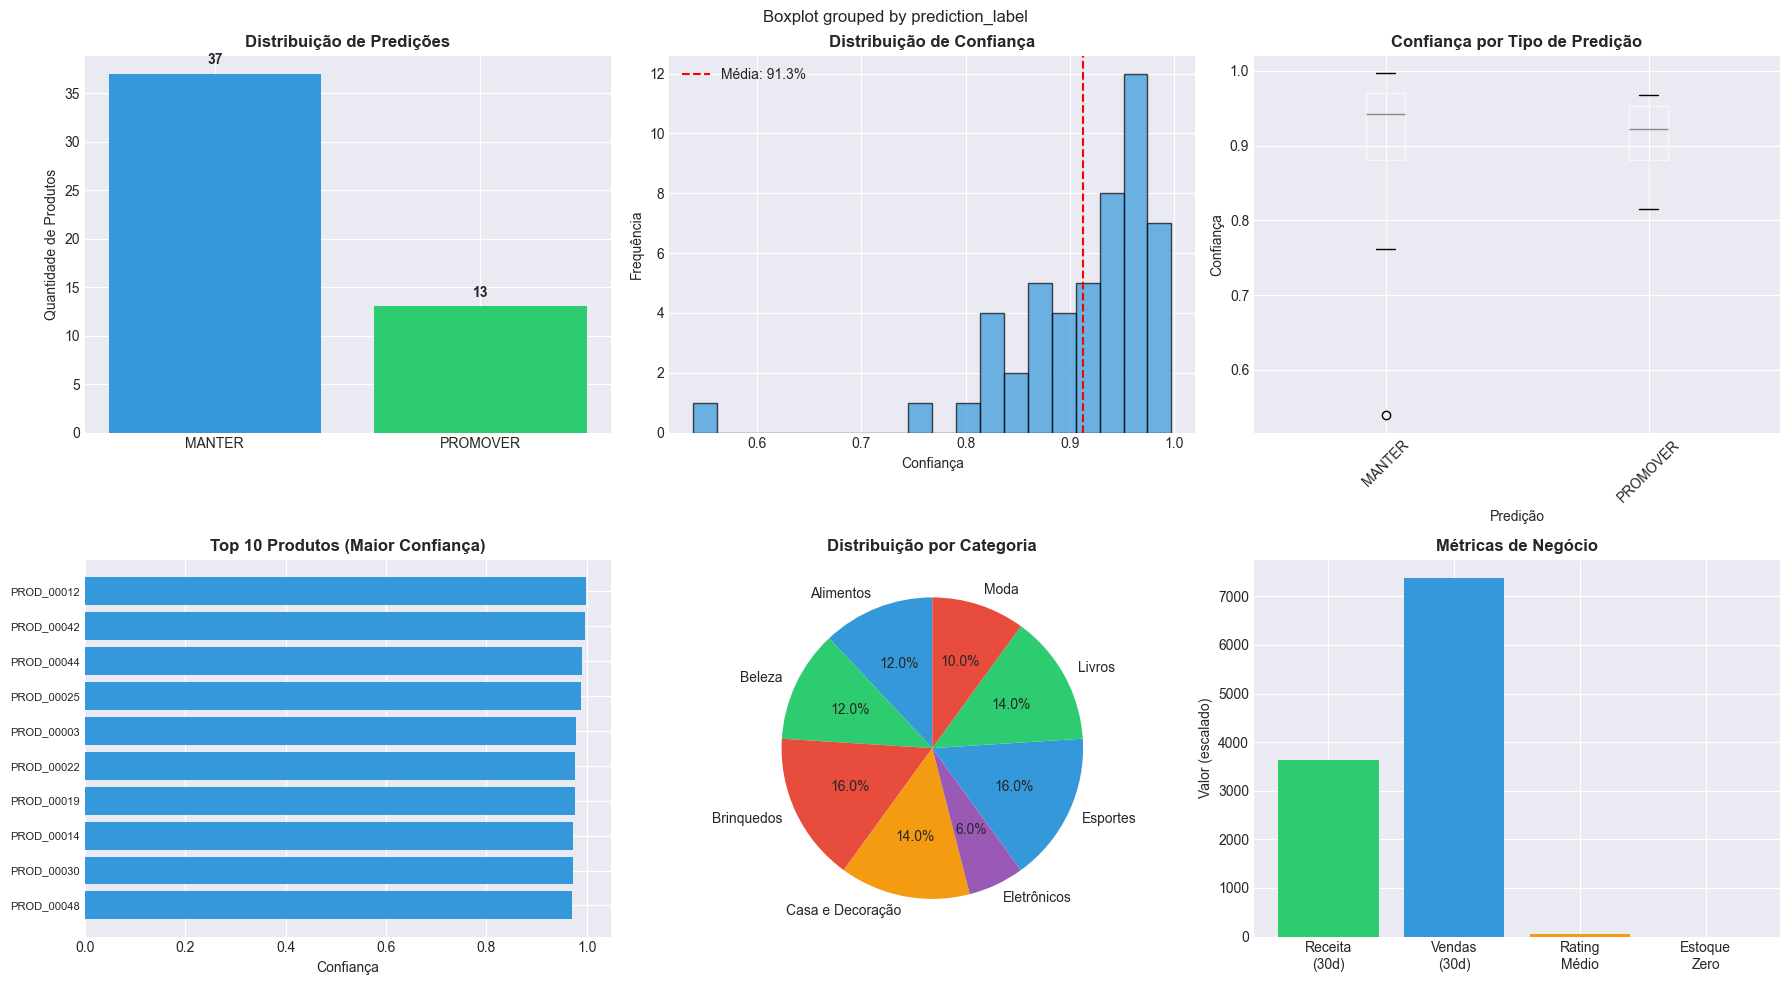

In [12]:
predictions_df = pd.DataFrame(analyst_results['predictions'])

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('📊 Análise de Predições do Ciclo de Vida dos Produtos', 
             fontsize=16, fontweight='bold')

# 1. Distribuição de Predições
ax1 = axes[0, 0]
pred_dist = stats['predictions_distribution']
colors = {'PROMOVER': '#2ecc71', 'MANTER': '#3498db', 'DESCONTINUAR': '#e74c3c'}
ax1.bar(pred_dist.keys(), pred_dist.values(), 
        color=[colors.get(k, '#95a5a6') for k in pred_dist.keys()])
ax1.set_title('Distribuição de Predições', fontweight='bold')
ax1.set_ylabel('Quantidade de Produtos')
for i, (k, v) in enumerate(pred_dist.items()):
    ax1.text(i, v + 1, str(v), ha='center', fontweight='bold')

# 2. Distribuição de Confiança
ax2 = axes[0, 1]
ax2.hist(predictions_df['confidence'], bins=20, color='#3498db', alpha=0.7, edgecolor='black')
ax2.axvline(conf_metrics['mean'], color='red', linestyle='--', 
            label=f"Média: {conf_metrics['mean']*100:.1f}%")
ax2.set_title('Distribuição de Confiança', fontweight='bold')
ax2.set_xlabel('Confiança')
ax2.set_ylabel('Frequência')
ax2.legend()

# 3. Confiança por Predição
ax3 = axes[0, 2]
predictions_df.boxplot(column='confidence', by='prediction_label', ax=ax3)
ax3.set_title('Confiança por Tipo de Predição', fontweight='bold')
ax3.set_xlabel('Predição')
ax3.set_ylabel('Confiança')
plt.sca(ax3)
plt.xticks(rotation=45)

# 4. Top 10 Produtos por Confiança
ax4 = axes[1, 0]
top_10 = predictions_df.nlargest(10, 'confidence')
ax4.barh(range(len(top_10)), top_10['confidence'], 
         color=[colors.get(label, '#95a5a6') for label in top_10['prediction_label']])
ax4.set_yticks(range(len(top_10)))
ax4.set_yticklabels(top_10['product_id'], fontsize=8)
ax4.set_title('Top 10 Produtos (Maior Confiança)', fontweight='bold')
ax4.set_xlabel('Confiança')
ax4.invert_yaxis()

# 5. Distribuição por Categoria
ax5 = axes[1, 1]
category_counts = stats['category_breakdown']
ax5.pie(category_counts.values(), labels=category_counts.keys(), autopct='%1.1f%%',
        startangle=90, colors=['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6'])
ax5.set_title('Distribuição por Categoria', fontweight='bold')

# 6. Métricas de Negócio
ax6 = axes[1, 2]
metrics_labels = ['Receita\n(30d)', 'Vendas\n(30d)', 'Rating\nMédio', 'Estoque\nZero']
metrics_values = [
    biz_metrics['total_revenue_last_30d'] / 1000,  # em milhares
    biz_metrics['total_sales_last_30d'],
    biz_metrics['average_rating'] * 20,  # escalar para visualização
    biz_metrics['products_out_of_stock'] * 10  # escalar para visualização
]
bars = ax6.bar(metrics_labels, metrics_values, color=['#2ecc71', '#3498db', '#f39c12', '#e74c3c'])
ax6.set_title('Métricas de Negócio', fontweight='bold')
ax6.set_ylabel('Valor (escalado)')

plt.tight_layout()
plt.show()